# Attention Mechanisms Explained

In this article we will explain different types of attention mechanism:

- Dot-product (encoder-decoder) attention
- Self attention
- Multi-head attention
- Bi-directional attention

## Dot-Product Attention

The first attention mechanism we will focus on is dot-product (encoder-decoder) attention. When we perform many NLP tasks we would typically convert a word into a vector (word2vec), with transformers we perform the same operation. These vectors allows us to represent meaning numerically (eg days of the week may be clustered together, or we can perform logical arithmetic on the vectors - $King - Man + Woman = Queen$).

Because of this, we would expect sentences with similar meaning to have a similar set of values. For example, in neural machine translation, the phrase *"Hello, how are you?"*, and the Italian equivalent *"Ciao, come va?"* should share a similar matrix representation.

Now, when we iterate through each word, and compare the individual vectors between the two sequences - we should find that words such as "Hello" and "Ciao" have higher similarity than words that have different meaning such as "are" and "Ciao".

![nmt_attention](../../assets/images/transformer/attention/nmt_attention.png)

We can display this mapping between word attentions better using a heatmap:


![attention_heatmatp](../../assets/images/transformer/attention/attention_heatmap.png)

## Alignment

This similarity between word vectors is known as 'alignment', and we calculate alignment between two vectors using the dot product. The dot product formula looks like:

$$u\cdot{v} = \lvert A \rvert \lvert B \rvert \cos{\theta} = \sum^{n}_{i=1}{a_nb_n}$$

So, let's imagine rather than a high-dimensional vector (as we would usually expect with word vectors), we have simple, three-dimensional vectors which can be visualized. We have three of these vectors each representing a word:

In [12]:
hello = [0.71, 0.14, 0.51]
hi = [0.69, 0.15, 0.48]
tomato = [0.16, 0.59, 0.49]

We can plot each of these onto a 3D chart:

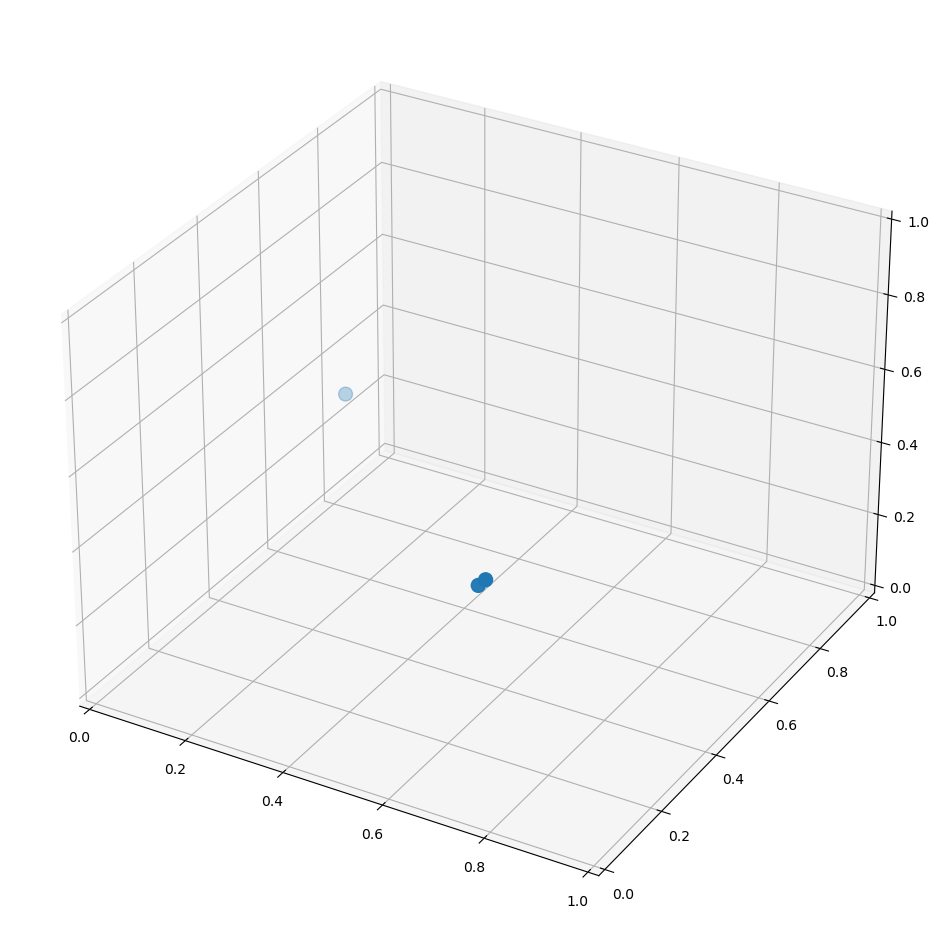

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(projection='3d')

xs = [hello[0], hi[0], tomato[0]]
ys = [hello[1], hi[1], tomato[1]]
zs = [hello[2], hi[2], tomato[2]]

ax.scatter(xs, ys, zs, s=100)

ax.set_xlim((0, 1))
ax.set_ylim((0, 1))
ax.set_zlim((0, 1))

plt.show()

The vectors for hello and hi share the same area, with tomato out to the upper-left. To measure alignment between each of these vectors, we calculate the dot product of each - we'll rename the vectors as otherwise the next part will look very messy:

a = hello = [0.71, 0.14, 0.51] b = hi = [0.69, 0.15, 0.48] c = tomato [0.16, 0.59, 0.49]

Now, to calculate the dot product between each of these vectors we do:

$$a\cdot{b} = \sum_{i=1}^{n}{a_nb_n} = (0.71*0.69) + (0.14*0.15) + (0.51*0.43)$$

In [14]:
import numpy as np

a = np.array(hello)
b = np.array(hi)
c = np.array(tomato)

np.matmul(a, b.T)

0.7556999999999999

In [15]:
np.matmul(a, c.T)

0.4461

In [16]:
np.matmul(b, c.T)

0.4341

Clearly, vectors a and b have better alignment between themselves than either to with c, as would be expected. It is this exact calculation that we perform for calculating the alignment vector, which we then use to calculate the dot-product attention between two sequences - however, rather than comparing word-to-word, we are comparing every word across the whole sequence in a single parallel operation.



## Queries, Keys, and Values
In dot-product attention, there are three tensors that we will be comparing. The `query Q, key K, and value V`. **K** and **V** are usually the same and are derived from (in our case) the English text, **Q** is another tensor which is derived from the Italian text.

The first thing we do is calculate the alignment vector between our English and Italian sequences, **K** and **Q** using the dot product, just as we did before.

![dot_product_attention](../../assets/images/transformer/attention/dot_product_attention.png)

Once we calculate the dot product, we apply a softmax function to convert the dot product alignment into probabilities. These are then multiplied by **V** to give us the attention tensor **z**.

## Self Attention
With dot-product attention, we calculated the alignment between word vectors from two different sequences - perfect for translation. Self-attention takes a different approach, here we compare words to previous words in the same sequence. So, where with dot-product attention we took our queries **Q** and keys **K** from two different sequences, self-attention takes them from the same sequence. Transformer models that look at previous tokens and try to predict the next include both text generation, and summarization.

So, just like before with dot-product attention, we calculate the dot-product again - this time taking **Q** and **K** from the same sequence.

![self_attention](../../assets/images/transformer/attention/self_attention.png)

After calculating the dot-product across all items in the sequence, we apply a mask to remove all values calculated for future words - leaving us with the dot-product between past words only. Next, we take the softmax just as before, and multiply the result by **V** to get our attention **Z**.

## Multihead Attention
Multihead attention allows us to build several representations of attention between words - so rather than calculating attention once, we calculate it several times, concatenate the results, and pass them through a linear layer.


And if we were to look at the multi-head attention segment in more detail we would see this:

![multihead-attention](../../assets/images/transformer/attention/multihead_attention.png)

## Bi-directional Attention

We've explored both dot-product attention, and self-attention. Where dot-product compared two sequences, and self attention compared previous tokens from the same sequence, bidirectional attention compares tokens from the same sequence in both directions, subsequent and previous. This is as simple as performing the exact same operation that we performed for self-attention, but excluding the masking operation - allowing each word to be mapped to every other word in the same sequence. So, we could call this bi-directional self* attention. This is particularly useful for masked language modeling - and is used in BERT (Bidirectional Encoder* Representations from Transformers) - bidirectional self-attention refers to the bidirectional encoder, or the BE of BERT.

![bi-directional_attention](../../assets/images/transformer/attention/bidirectional_attention.png)